In [7]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df=pd.read_csv('/content/indiastatewisedataanalysis.csv')

In [11]:
df

State & District  Population    Male  \
0    district_code:1, state_name:JAMMU AND KASHMIR,...      870354  474190   
1    district_code:2, state_name:JAMMU AND KASHMIR,...      753745  398041   
2    district_code:3, state_name:JAMMU AND KASHMIR,...      133487   78971   
3    district_code:4, state_name:JAMMU AND KASHMIR,...      140802   77785   
4    district_code:5, state_name:JAMMU AND KASHMIR,...      476835  251899   
..                                                 ...         ...     ...   
635  district_code:636, state_name:PONDICHERRY, dis...       41816   19143   
636  district_code:637, state_name:PONDICHERRY, dis...      200222   97809   
637  district_code:638, state_name:ANDAMAN AND NICO...       36842   20727   
638  district_code:639, state_name:ANDAMAN AND NICO...      105597   54861   
639  district_code:640, state_name:ANDAMAN AND NICO...      238142  127283   

     Female  Literate  Male_Literate  Female_Literate     SC  Male_SC  \
0    396164    439654         282823           156831   1048     1046   
1    355704    335649         207741           127908    368      343   
2     54516     93770          62834            30936    488      444   
3     63017     86236          56301            29935     18       12   
4    224936    261724         163333            98391    556      406   
..      ...       ...            ...              ...    ...      ...   
635   22673     36470          16610            19860    144       77   
636  102413    154916          79903            75013  35348    17206   
637   16115     25332          15397             9935      0        0   
638   50736     78683          43186            35497      0        0   
639  110859    190266         105794            84472      0        0   

     Female_SC  ...  Secondary_Education  Higher_Education  \
0            2  ...                74948             39709   
1           25  ...                66459             41367   
2           44  ...                16265              8923   
3            6  ...                16938              9826   
4          150  ...                46062             29517   
..         ...  ...                  ...               ...   
635         67  ...                 8773              5711   
636      18142  ...                29456             15930   
637          0  ...                 6325              3668   
638          0  ...                12707             10042   
639          0  ...                42150             29910   

     Graduate_Education  Other_Education  Literate_Education  \
0                 21751             6402              405015   
1                 27950             6857              374972   
2                  6197              575               75493   
3                  3077              408               82938   
4                 13962             1884              288430   
..                  ...              ...                 ...   
635                4475              978               36858   
636               18998             4877              154561   
637                1300              364               27746   
638                5133              809               87325   
639               22388             3077              189834   

     Illiterate_Education  Total_Education  Age_Group_0_29  Age_Group_30_49  \
0                  289765           694780          600759           178435   
1                  342646           717618          503223           160933   
2                   32637           108130           70703            41515   
3                   39854           122792           87532            35561   
4                  164044           452474          304979           109818   
..                    ...              ...             ...              ...   
635                  2993            39851           19760            12543   
636                 32717           187278          102333            60089   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   State & District                  640 non-null    object
 1   Population                        640 non-null    int64 
 2   Male                              640 non-null    int64 
 3   Female                            640 non-null    int64 
 4   Literate                          640 non-null    int64 
 5   Male_Literate                     640 non-null    int64 
 6   Female_Literate                   640 non-null    int64 
 7   SC                                640 non-null    int64 
 8   Male_SC                           640 non-null    int64 
 9   Female_SC                         640 non-null    int64 
 10  ST                                640 non-null    int64 
 11  Male_ST                           640 non-null    int64 
 12  Female_ST             

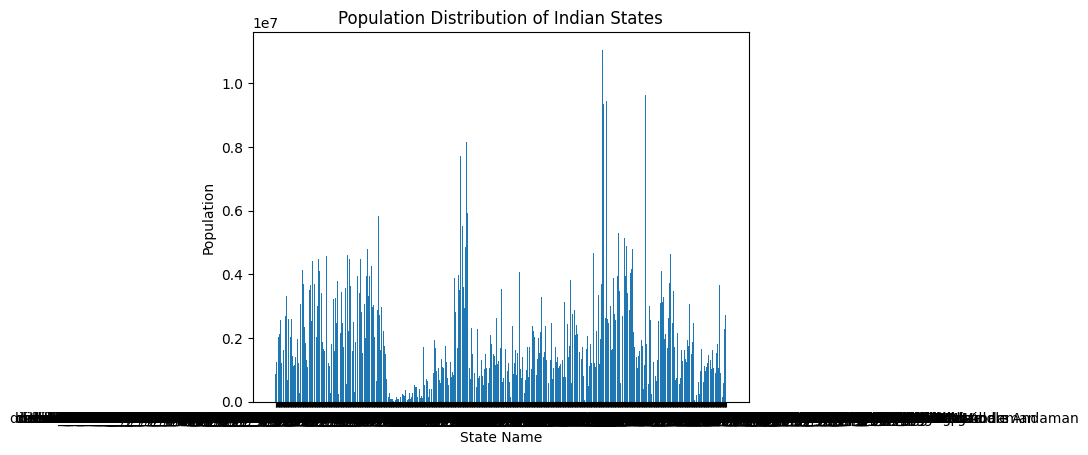

In [13]:
#What is the Population Distribution of Indian States?
import pandas as pd
import matplotlib.pyplot as plt

# Get the population of each state
population_per_state = df.groupby("State & District")["Population"].sum()

# Get bar names
bar_names = population_per_state.index.astype(str).to_list()

# Create a bar chart of the population of each state
plt.bar(population_per_state.index, population_per_state.values)
plt.xlabel("State Name")
plt.ylabel("Population")
plt.title("Population Distribution of Indian States")
plt.show()


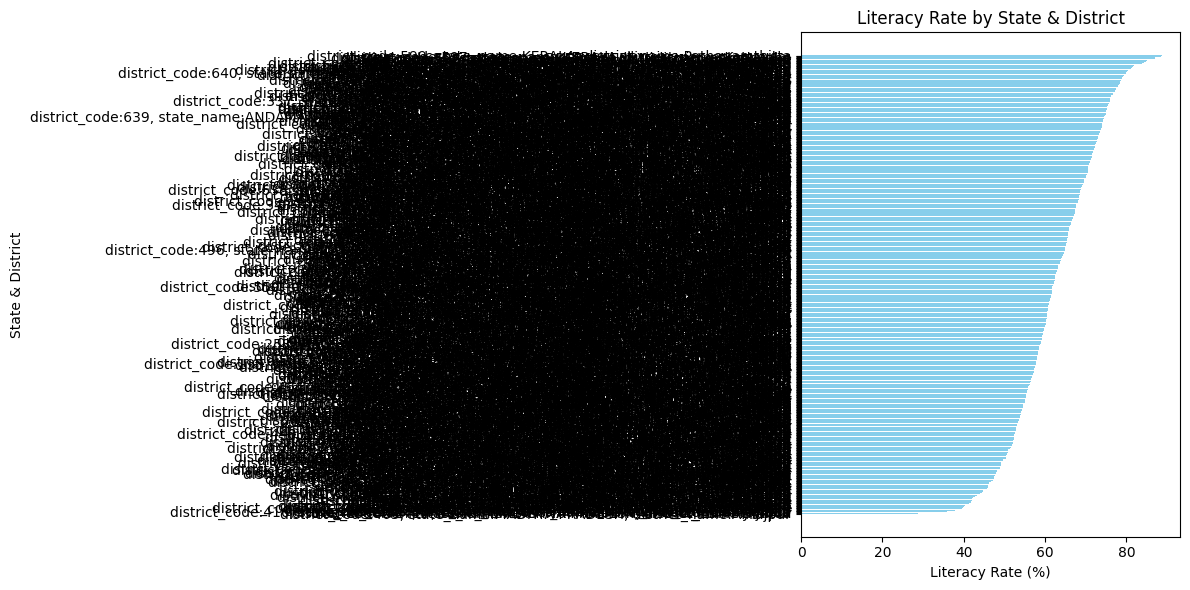

In [31]:
#What is Literacy rate by state and district?
# Calculate literacy rate
df['Literacy Rate'] = (df['Literate'] / df['Population']) * 100

# Sort the DataFrame by literacy rate in descending order
df_sorted = df.sort_values(by='Literacy Rate', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted['State & District'], df_sorted['Literacy Rate'], color='skyblue')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('State & District')
plt.title('Literacy Rate by State & District')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rate at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


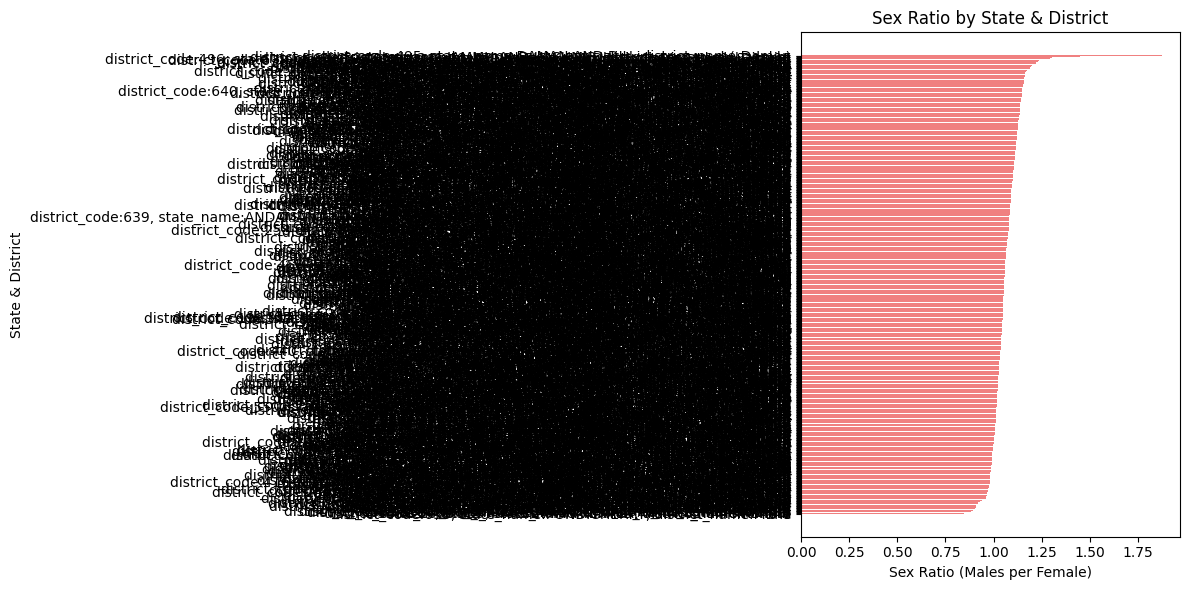

In [33]:
#What is Sex Ratio by State & District?
# Calculate the sex ratio
df['Sex Ratio'] = df['Male'] / df['Female']

# Sort the DataFrame by sex ratio in descending order
df_sorted = df.sort_values(by='Sex Ratio', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted['State & District'], df_sorted['Sex Ratio'], color='lightcoral')
plt.xlabel('Sex Ratio (Males per Female)')
plt.ylabel('State & District')
plt.title('Sex Ratio by State & District')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest ratio at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


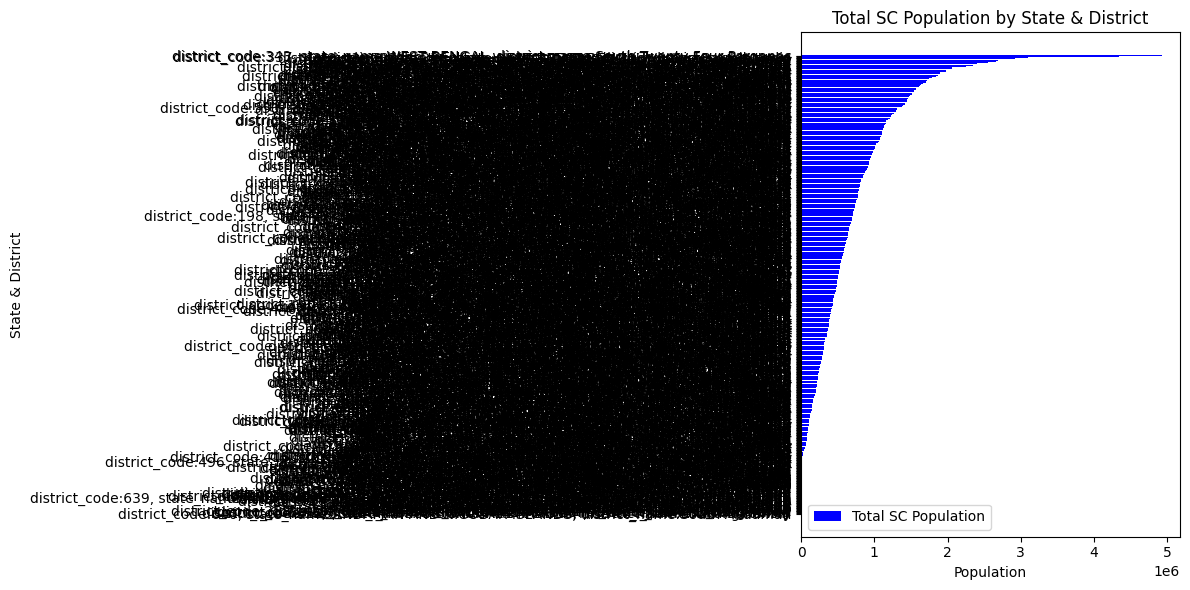

In [34]:
#What is Total SC Population by State & District?
# Calculate the total SC population for each state and district
df['Total_SC_Population'] = df['SC'] + df['Male_SC'] + df['Female_SC']

# Sort the DataFrame by the total SC population in descending order
df_sorted = df.sort_values(by='Total_SC_Population', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted['State & District'], df_sorted['Total_SC_Population'], label='Total SC Population', color='blue')

plt.xlabel('Population')
plt.ylabel('State & District')
plt.title('Total SC Population by State & District')
plt.legend()  # Add a legend
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest population at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


<ipython-input-35-cbf87b3209c0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_religion_caste['Total_Population'] = df_religion_caste[religion_caste_columns].sum(axis=1)


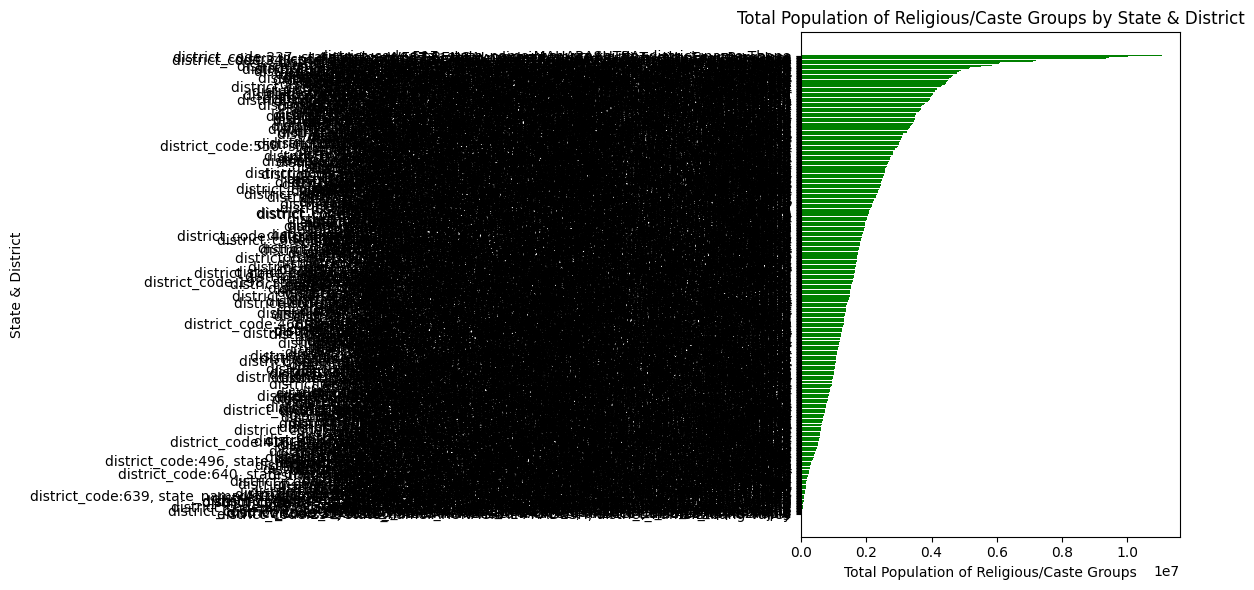

In [35]:
#What is Total Population of Religious/Caste Groups by State & District?
# List of columns representing different religious or caste groups
religion_caste_columns = [
    'Hindus',
    'Muslims',
    'Christians',
    'Sikhs',
    'Buddhists',
    'Jains',
    'Others_Religions',
    'Religion_Not_Stated'
]

# Create a new DataFrame with 'State & District' and the columns representing religious or caste groups
df_religion_caste = df[['State & District'] + religion_caste_columns]

# Sort the DataFrame by the total population of all religious or caste groups in descending order
df_religion_caste['Total_Population'] = df_religion_caste[religion_caste_columns].sum(axis=1)
df_sorted = df_religion_caste.sort_values(by='Total_Population', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted['State & District'], df_sorted['Total_Population'], color='green')
plt.xlabel('Total Population of Religious/Caste Groups')
plt.ylabel('State & District')
plt.title('Total Population of Religious/Caste Groups by State & District')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest population at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


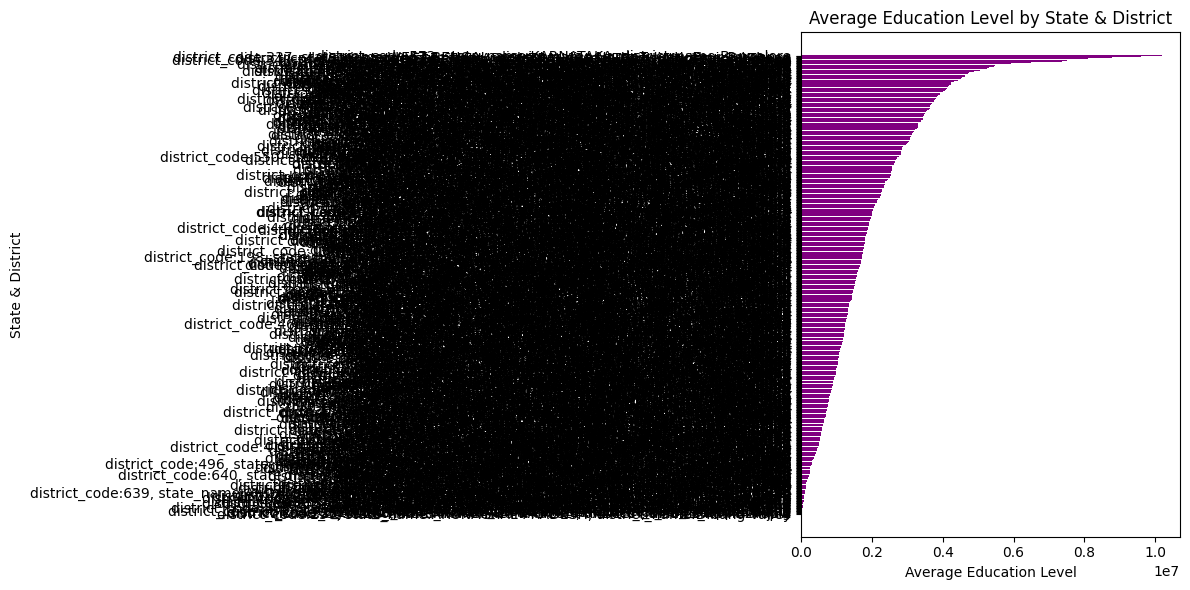

In [36]:
#What is Average Education Level by State & District?
# Calculate the average education level for each state and district
average_education_per_state_district = df.groupby('State & District')['Total_Education'].mean()

# Sort the DataFrame by average education level in descending order (optional)
df_sorted = average_education_per_state_district.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted.index, df_sorted.values, color='purple')
plt.xlabel('Average Education Level')
plt.ylabel('State & District')
plt.title('Average Education Level by State & District')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest education level at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


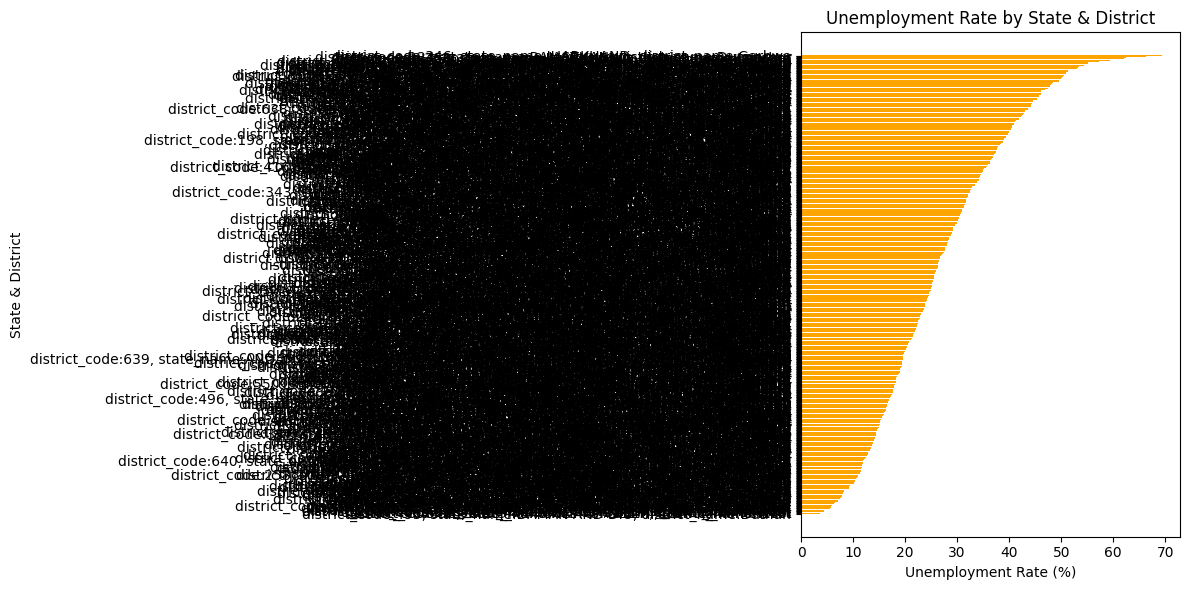

In [37]:
# What is Unemployment Rate by State & District?
# Calculate the unemployment rate
df['Unemployment Rate'] = ((df['Workers'] - df['Main_Workers']) / df['Workers']) * 100

# Sort the DataFrame by unemployment rate in descending order
df_sorted = df.sort_values(by='Unemployment Rate', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted['State & District'], df_sorted['Unemployment Rate'], color='orange')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('State & District')
plt.title('Unemployment Rate by State & District')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rate at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


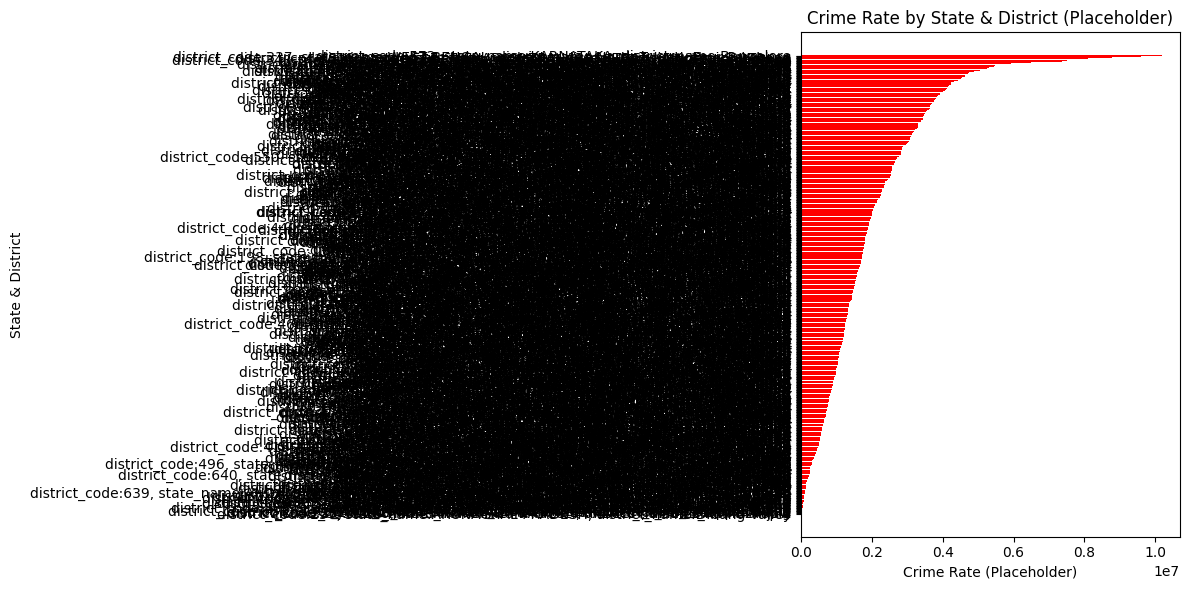

In [38]:
#What is Crime Rate by State & District ?
# Calculate a placeholder "Crime Rate" based on 'Total_Education' (this is just for demonstration)
df['Crime Rate'] = df['Total_Education']

# Sort the DataFrame by the placeholder "Crime Rate" in descending order (optional)
df_sorted = df.sort_values(by='Crime Rate', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted['State & District'], df_sorted['Crime Rate'], color='red')
plt.xlabel('Crime Rate (Placeholder)')
plt.ylabel('State & District')
plt.title('Crime Rate by State & District (Placeholder)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest "crime rate" at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


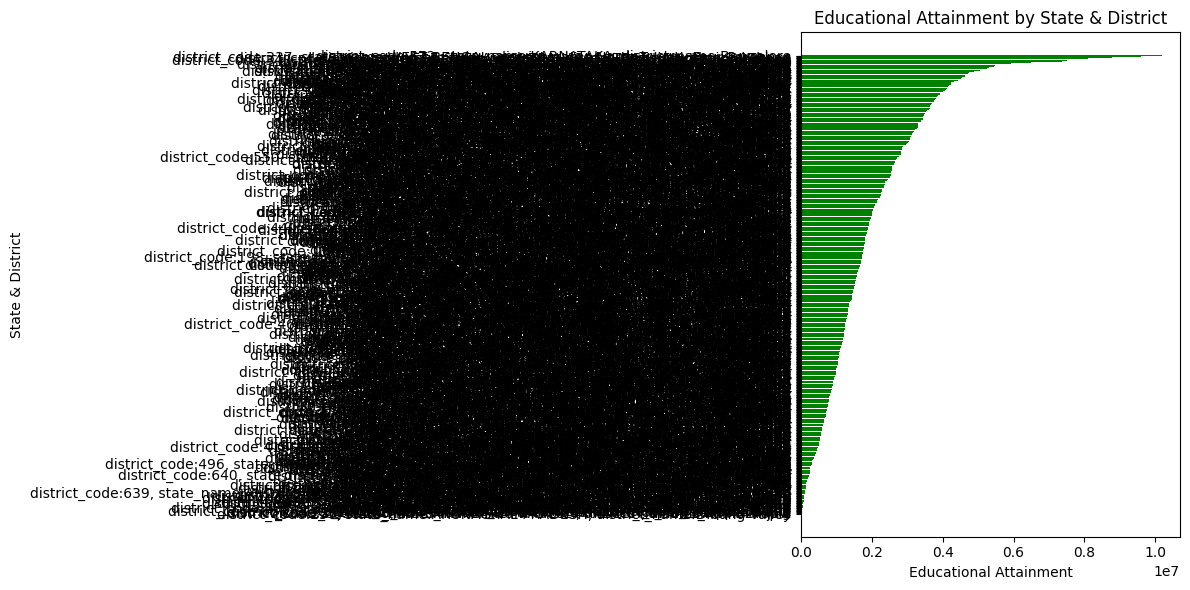

In [39]:
#What is Educational Attainment by State & District?
# Sort the DataFrame by 'Total_Education' in descending order (optional)
df_sorted = df.sort_values(by='Total_Education', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(df_sorted['State & District'], df_sorted['Total_Education'], color='green')
plt.xlabel('Educational Attainment')
plt.ylabel('State & District')
plt.title('Educational Attainment by State & District')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest attainment at the top
plt.tight_layout()  # Ensure labels fit within the plot area

# Display the plot
plt.show()


<ipython-input-40-3773e4f3d493>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


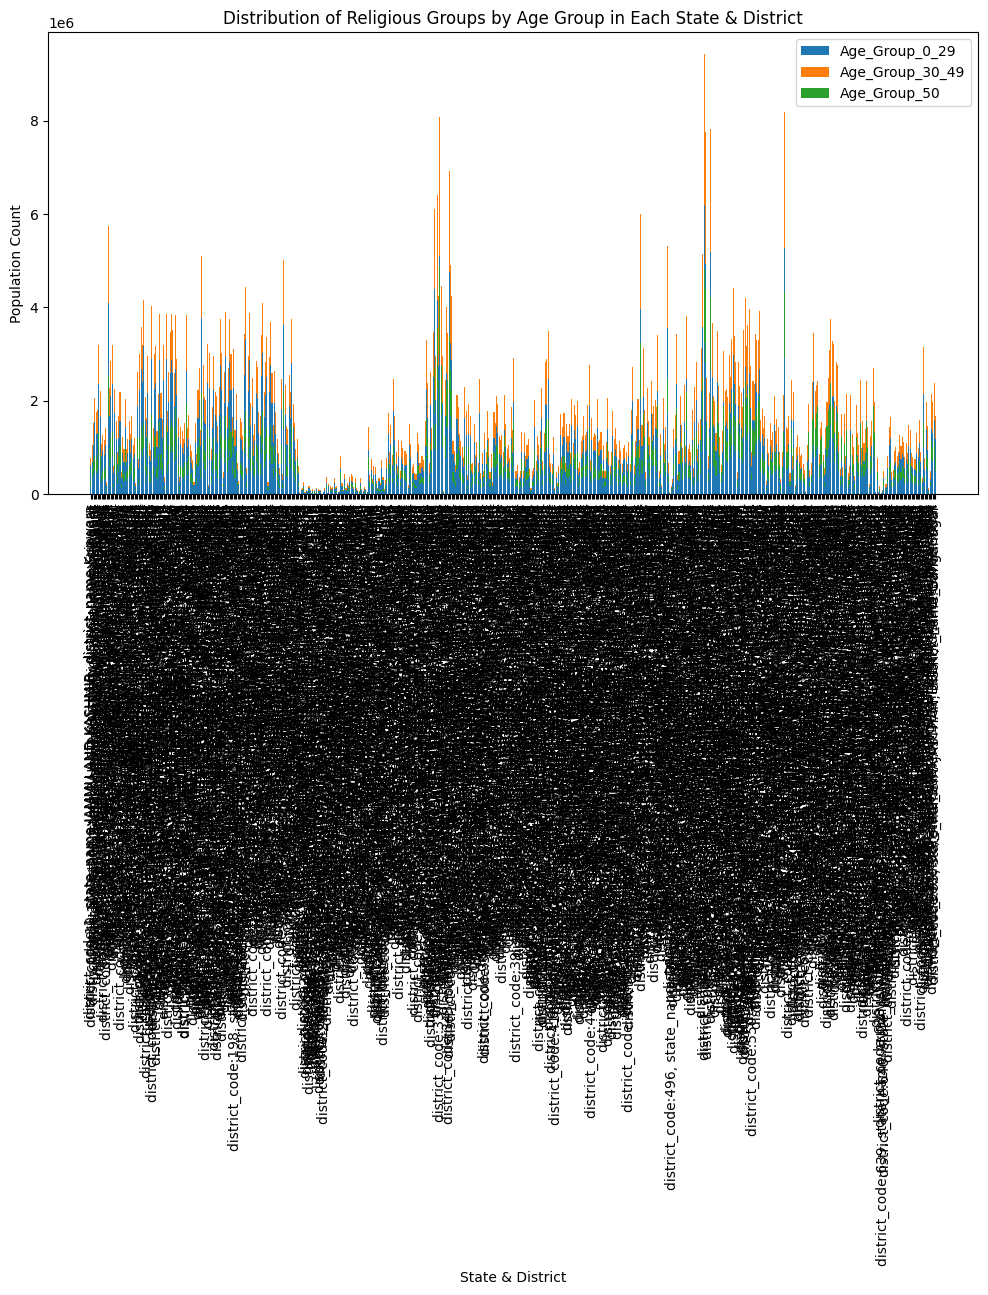

In [40]:
#What is Distribution of Religious Groups by Age Group in Each State & District?
# Define the columns representing religious groups and age groups
religious_groups = ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains', 'Others_Religions', 'Religion_Not_Stated']
age_groups = ['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']

# Create a new DataFrame to store the data for the chart
data_for_chart = df[['State & District'] + religious_groups + age_groups]

# Group the data by 'State & District' and calculate the sum for each group
grouped_data = data_for_chart.groupby('State & District').sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35

for i, age_group in enumerate(age_groups):
    if i == 0:
        ax.bar(grouped_data.index, grouped_data[age_group], label=age_group)
    else:
        bottom_values = grouped_data[age_groups[i - 1]]
        ax.bar(grouped_data.index, grouped_data[age_group], label=age_group, bottom=bottom_values)

# Add labels and title
ax.set_xlabel('State & District')
ax.set_ylabel('Population Count')
ax.set_title('Distribution of Religious Groups by Age Group in Each State & District')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()
plt.show()


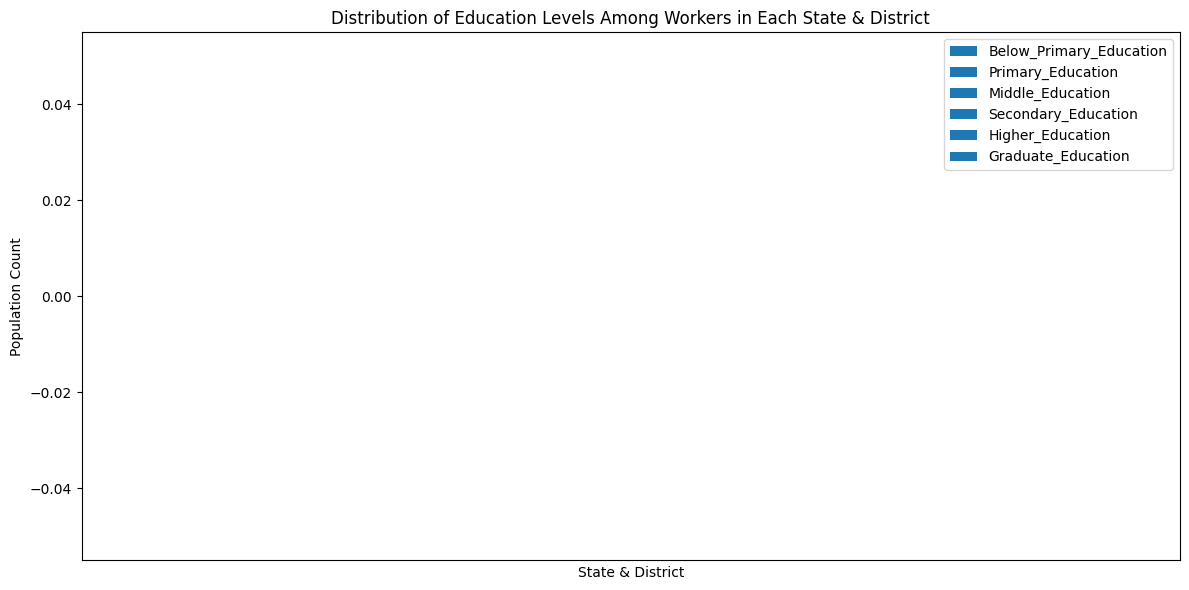

In [41]:
#What is Distribution of Education Levels Among Workers in Each State & District?
# Define the education level columns
education_levels = ['Below_Primary_Education', 'Primary_Education', 'Middle_Education',
                    'Secondary_Education', 'Higher_Education', 'Graduate_Education']

# Filter the data for 'Workers' only
worker_data = df[df['Workers'] == 1]  # Assuming '1' represents 'Workers' in the 'Workers' column

# Create a bar chart for education levels among workers
fig, ax = plt.subplots(figsize=(12, 6))

# Define the x-axis positions for bars
x = range(len(worker_data))

# Plot bars for each education level
for i, level in enumerate(education_levels):
    worker_values = worker_data[level]
    ax.bar([pos + i * 0.15 for pos in x], worker_values, 0.15, label=level)

# Add labels and title
ax.set_xlabel('State & District')
ax.set_ylabel('Population Count')
ax.set_title('Distribution of Education Levels Among Workers in Each State & District')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks([pos + 0.15 * (len(education_levels) - 1) / 2 for pos in x], worker_data['State & District'], rotation=90)

# Show the chart
plt.tight_layout()
plt.show()


<ipython-input-42-237b9f8a2b95>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


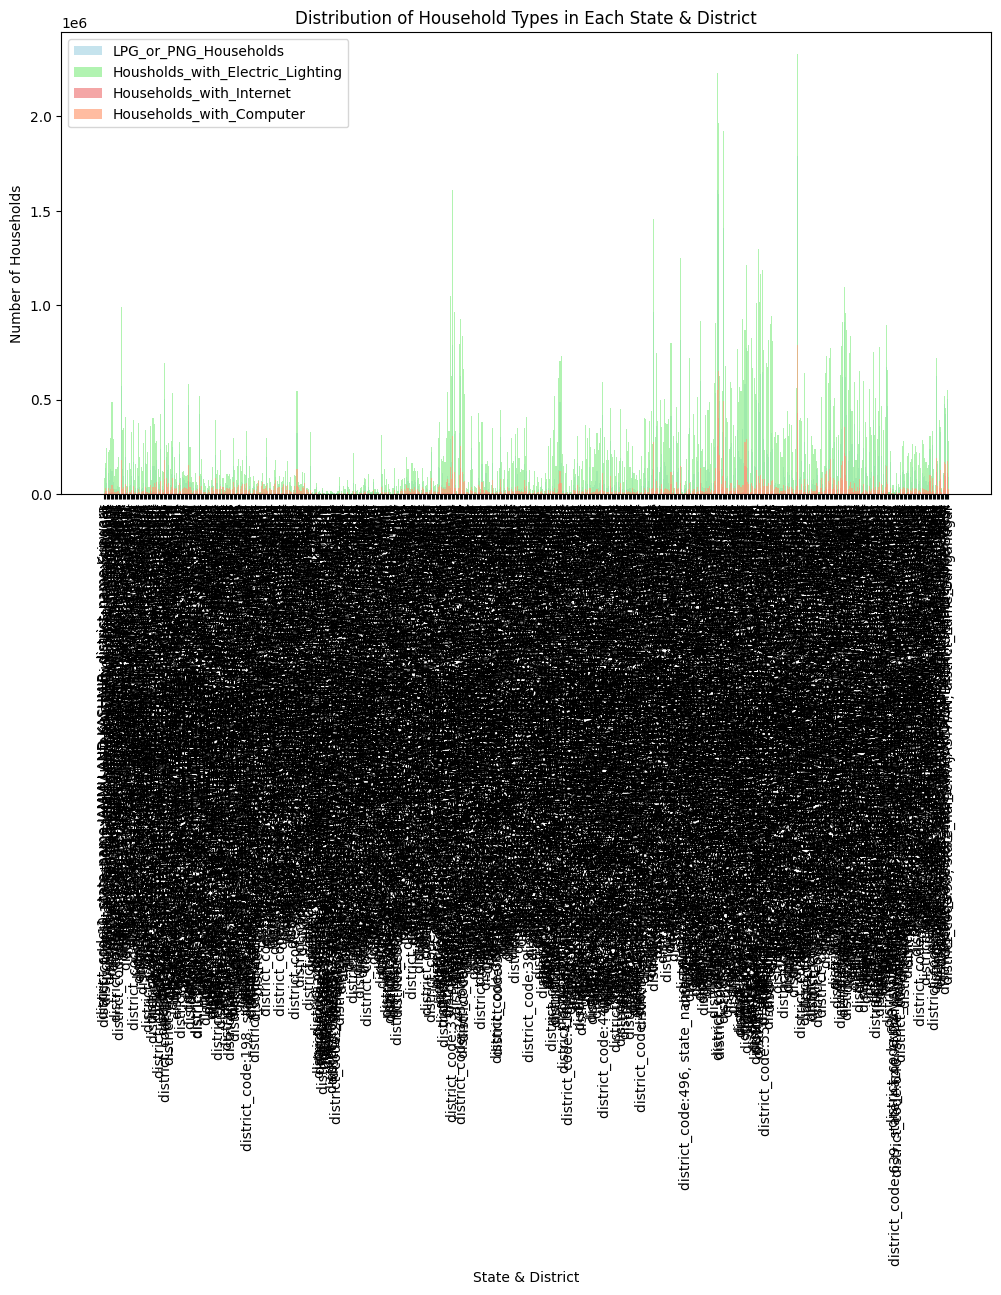

In [42]:
#What is Distribution of Household Types in Each State & District?
# Select the relevant columns for household types
household_columns = [
    'LPG_or_PNG_Households',
    'Housholds_with_Electric_Lighting',
    'Households_with_Internet',
    'Households_with_Computer',
]

# Group the data by 'State & District' and calculate the sum of each household type
household_distribution = df.groupby('State & District')[household_columns].sum()

# Transpose the DataFrame to have states/districts as rows and household types as columns
household_distribution = household_distribution.transpose()

# Plot the bar chart
plt.figure(figsize=(12, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

for i, (household_type, color) in enumerate(zip(household_distribution.index, colors)):
    plt.bar(
        household_distribution.columns,
        household_distribution.loc[household_type],
        label=household_type,
        color=color,
        alpha=0.7,
    )

plt.xlabel('State & District')
plt.ylabel('Number of Households')
plt.title('Distribution of Household Types in Each State & District')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-43-18f42ba33a93>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


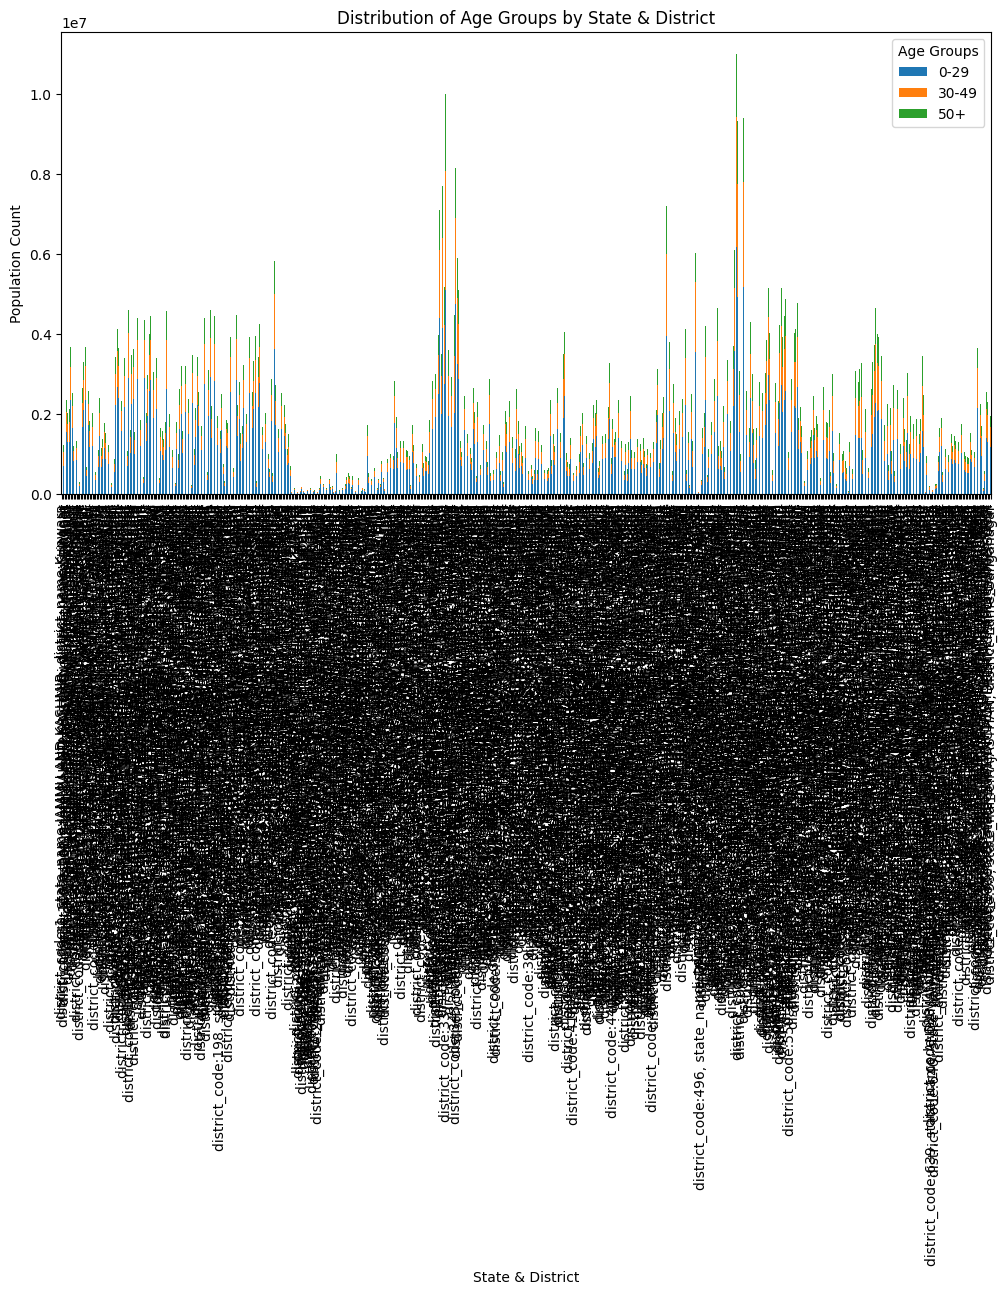

In [43]:
#What is Distribution of Age Groups by State & District?
# Group the data by state and calculate the sum of age groups
age_group_distribution = df.groupby('State & District')[['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']].sum()

# Create a bar chart
age_group_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Age Groups by State & District')
plt.xlabel('State & District')
plt.ylabel('Population Count')
plt.xticks(rotation=90)
plt.legend(title='Age Groups', labels=['0-29', '30-49', '50+'])

plt.tight_layout()
plt.show()


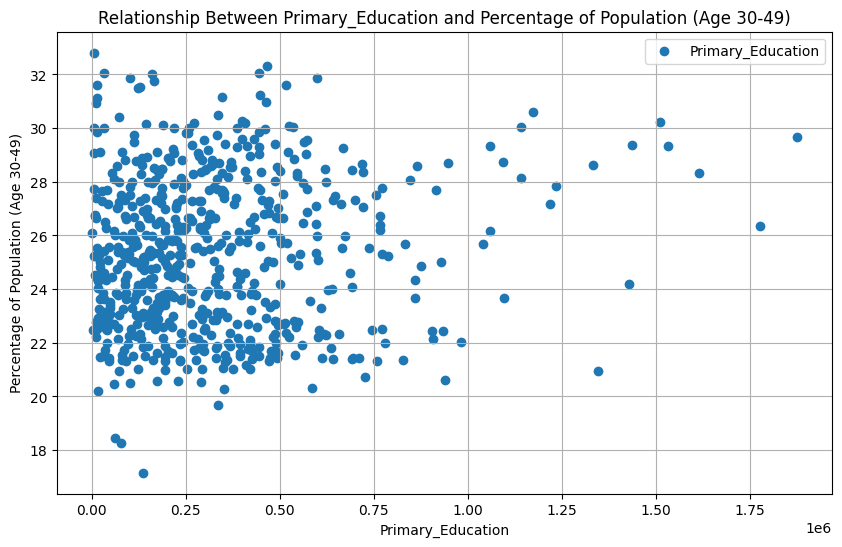

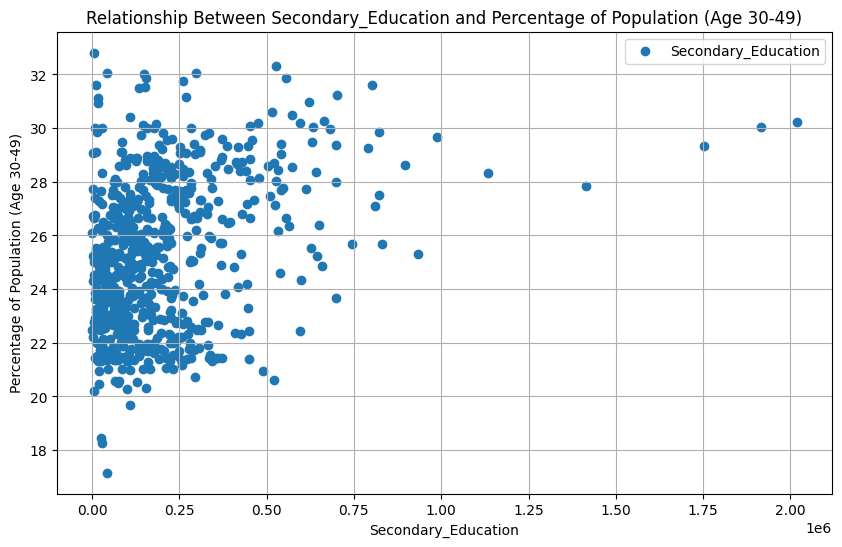

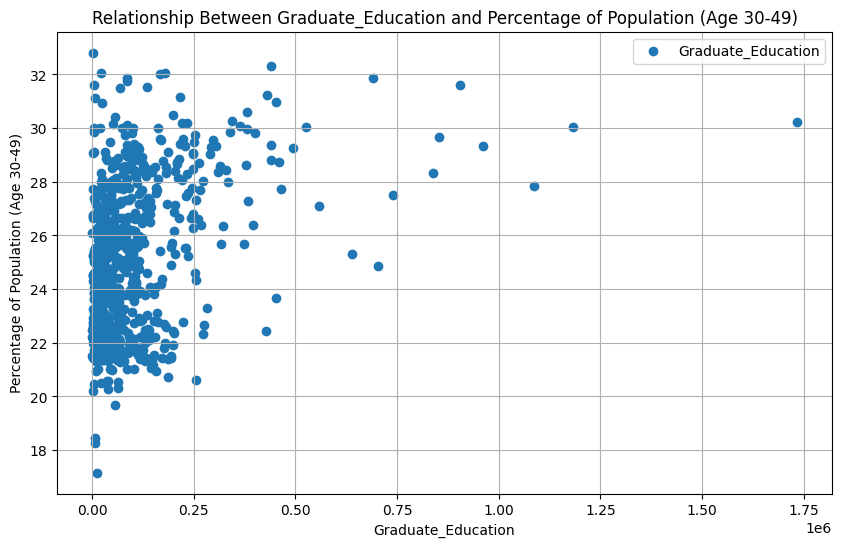

In [45]:
#What is percentage of the population in the age group 30-49?
# Calculate the percentage of the population in the age group 30-49
df['Percentage_Age_30_49'] = (df['Age_Group_30_49'] / df['Population']) * 100

# Select the relevant columns for education and age group
education_columns = ['Primary_Education', 'Secondary_Education', 'Graduate_Education']
data = df[['State & District'] + education_columns + ['Percentage_Age_30_49']]

# Create a scatterplot for each education level
for education_level in education_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[education_level], data['Percentage_Age_30_49'], label=education_level)
    plt.title(f'Relationship Between {education_level} and Percentage of Population (Age 30-49)')
    plt.xlabel(f'{education_level}')
    plt.ylabel('Percentage of Population (Age 30-49)')
    plt.grid()
    plt.legend()
    plt.show()
